In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
file = open("/kaggle/input/conversation/pg1342.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

print(len(lines))

siz=len(lines)
train_size=int(siz*8/10)
train_data=lines[:train_size]
test_data=lines[train_size:]


The First Line:  ﻿The Project Gutenberg eBook of Pride and prejudice, by Jane Austen

The Last Line:  subscribe to our email newsletter to hear about new eBooks.

14904


In [3]:
# import pandas as pd

# training_data = df.sample(frac=0.8, random_state=25)
# testing_data = df.drop(training_data.index)

lines=train_data
data=""
for i in lines:
    data=''.join(lines)
    
data=data.replace('\n','').replace('\ufeff','').replace('\r','').replace('"','')
data[:360]
len(data)

589145

In [4]:
# import string

# translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
# new_data = data.translate(translator)

# new_data[:500]

In [5]:
data=data.split()        
data = ' '.join(data)
data[:500]
len(data)

583045

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
print(len(sequence_data))
print(sequence_data[:10])

99220
[1, 2254, 1889, 1364, 3, 260, 4, 1014, 29, 75]


In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

11797


In [8]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  99217


array([[   1, 2254, 1889, 1364],
       [2254, 1889, 1364,    3],
       [1889, 1364,    3,  260],
       [1364,    3,  260,    4],
       [   3,  260,    4, 1014],
       [ 260,    4, 1014,   29],
       [   4, 1014,   29,   75],
       [1014,   29,   75, 4347],
       [  29,   75, 4347, 1364],
       [  75, 4347, 1364,   22]])

In [9]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences


# input_sequence=[]
# for lines in corpus:
#     token_list=tokenizer.texts_to_sequences([lines])[0]
    
#     for i in range(1,len(token_list)):
#         nGramSeq=token_list[:i+1]
#         input_sequence.append(nGramSeq)
# max_seq_len=max([len(x) for x in input_sequence])
# input_sequence=np.array(pad_sequences(input_sequence,maxlen=max_seq_len,padding='pre'))
# X,y=input_sequence[:,:-1],input_sequence[:,:-1]
# y=to_categorical(y,num_classes=total_words+1)

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [[   1 2254 1889]
 [2254 1889 1364]
 [1889 1364    3]
 [1364    3  260]
 [   3  260    4]]
The responses are:  [1364    3  260    4 1014]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=3)) 
# we will be adding embedding layer which will take 3 arguemnts
# vectorization of model will be done in embedding layer.
# with input dimensions as size of vocabulary in my text data 
# output dimension which is the size of vector space in which word will be embedded, in our case it is 10, i.e; the size of word vector for each word is 10.
# we will be using last 3 words to predict the next word

model.add(LSTM(1000, return_sequences=True))
# we will be adding the lstm layer first parameter is number of units i.e; the dimensionality of the output space
#  return sequence true indicates there is another lstm layer coming.

model.add(LSTM(1000))

model.add(Dense(1000, activation="relu"))
# our activation function is relu => which makes negative values to 0,

model.add(Dense(vocab_size, activation="softmax"))
# now our number of units will be vocab_size since we need our output within this vocabulary.
# here our activation function is soft_max => which 

2022-12-02 12:37:21.540003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:37:21.540906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:37:21.878831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:37:21.879707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:37:21.880479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 100)            1179700   
_________________________________________________________________
lstm (LSTM)                  (None, 3, 1000)           4404000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 11797)             11808797  
Total params: 26,397,497
Trainable params: 26,397,497
Non-trainable params: 0
_________________________________________________________________


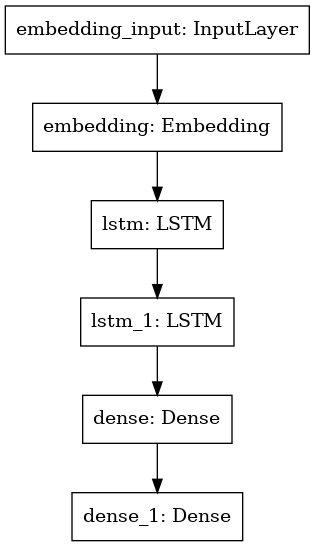

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'

tensorboard_Visualization = TensorBoard(log_dir=logdir)

history=model.fit(X, y, epochs=70, batch_size=128, callbacks=[checkpoint, reduce, tensorboard_Visualization])

2022-12-02 12:37:30.986658: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-02 12:37:30.986707: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-02 12:37:30.990685: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs
2022-12-02 12:37:31.516519: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-02 12:37:31.516714: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-02 12:37:31.670281: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4681851796 exceeds 10% of free system memory.
2022-12-02 12:37:37.891812: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4681851796 exceeds 10% of free system memory.
2022-12-02 12:37:41.611660: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (regis

Epoch 1/70


2022-12-02 12:37:46.024754: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/776 [..............................] - ETA: 1:35:01 - loss: 9.3756 - accuracy: 0.0000e+00

2022-12-02 12:37:49.140310: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-02 12:37:49.140359: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/776 [..............................] - ETA: 9:27 - loss: 9.3749 - accuracy: 0.0039       

2022-12-02 12:37:49.781797: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-02 12:37:49.782516: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-02 12:37:49.940551: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 310 callback api events and 307 activity events. 
2022-12-02 12:37:49.951694: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-02 12:37:49.974388: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logsnextword1/train/plugins/profile/2022_12_02_12_37_49

2022-12-02 12:37:49.981253: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logsnextword1/train/plugins/profile/2022_12_02_12_37_49/aa8af432d896.trace.json.gz


  7/776 [..............................] - ETA: 2:26 - loss: 9.3657 - accuracy: 0.0145

2022-12-02 12:37:50.013854: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logsnextword1/train/plugins/profile/2022_12_02_12_37_49

2022-12-02 12:37:50.017441: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logsnextword1/train/plugins/profile/2022_12_02_12_37_49/aa8af432d896.memory_profile.json.gz
2022-12-02 12:37:50.018197: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logsnextword1/train/plugins/profile/2022_12_02_12_37_49
Dumped tool data for xplane.pb to logsnextword1/train/plugins/profile/2022_12_02_12_37_49/aa8af432d896.xplane.pb
Dumped tool data for overview_page.pb to logsnextword1/train/plugins/profile/2022_12_02_12_37_49/aa8af432d896.overview_page.pb
Dumped tool data for input_pipeline.pb to logsnextword1/train/plugins/profile/2022_12_02_12_37_49/aa8af432d896.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logsnextword1/train/plu

776/776 [==============================] - 27s 25ms/step - loss: 6.9151 - accuracy: 0.0376

Epoch 00001: loss improved from inf to 6.91509, saving model to next_words.h5
Epoch 2/70
776/776 [==============================] - 19s 24ms/step - loss: 6.3044 - accuracy: 0.0812

Epoch 00002: loss improved from 6.91509 to 6.30436, saving model to next_words.h5
Epoch 3/70
776/776 [==============================] - 19s 24ms/step - loss: 5.7698 - accuracy: 0.1117

Epoch 00003: loss improved from 6.30436 to 5.76977, saving model to next_words.h5
Epoch 4/70
776/776 [==============================] - 19s 25ms/step - loss: 5.3651 - accuracy: 0.1335

Epoch 00004: loss improved from 5.76977 to 5.36508, saving model to next_words.h5
Epoch 5/70
776/776 [==============================] - 19s 25ms/step - loss: 5.0161 - accuracy: 0.1580

Epoch 00005: loss improved from 5.36508 to 5.01608, saving model to next_words.h5
Epoch 6/70
776/776 [==============================] - 19s 25ms/step - loss: 4.6797 - accur

In [16]:
# model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(model, string):
    plt.plot(model.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

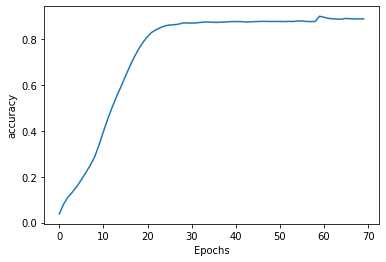

In [18]:
plot_graphs(history, 'accuracy')

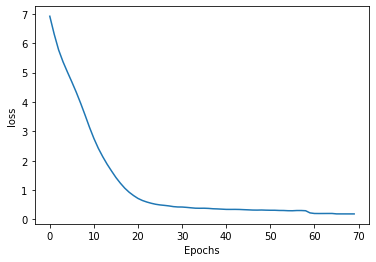

In [19]:
plot_graphs(history, 'loss')

In [20]:
# tensorboard_Visualization = TensorBoard(log_dir=logdir)
# tensorboard --logdir="./logsnextword1"
# from IPython.display import Image 
# pil_img = Image(filename='graph1.png')
# display(pil_img)

In [21]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle


model = load_model('next_words.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))


def Predict_Next_Words(model, tokenizer, text):
    sequence= tokenizer.texts_to_sequences([text])
    sequence=np.array(sequence)
    preds=np.argmax(model.predict(sequence))
    predicted_word=""
    
    for key,value in tokenizer.word_index.items():
        if(value == preds):
            predicted_word=key
            break
    print(predicted_word)
    return predicted_word
    

In [22]:
while(True):

    text = input("Enter your line: ")
    
    if text == "stop":
        print("Ending The Program.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-3:]
#             print(text)
            
            Predict_Next_Words(model,tokenizer,text)
        except Exception as e:
            print("Error occured: ",e)
            continue

Enter your line:  objectionable in having


accepted


Enter your line:  excellent character of


my


Enter your line:  united efforts of


his


Enter your line:  no hesitation of


complying


Enter your line:  family circle was


even


Enter your line:  how are you


”


Enter your line:  I am fine


years


Enter your line:  had you dinner


to


Enter your line:  are you leaving


longbourn


Enter your line:  unexpected visit of


a


Enter your line:  stop the script


he


Enter your line:  stop


Ending The Program.....
